# Load des Datas

## Start fichier CSV ERP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
erp = pd.read_csv("../data/ERP P6.csv")

In [4]:
erp.tail(10)

,product_id,onsale_web,price,stock_quantity,stock_status
815,7194,0,31,5,instock
816,7195,0,21,1,instock
817,7196,0,31,55,instock
818,7200,0,31,6,instock
819,7201,0,31,18,instock
820,7203,0,45,30,instock
821,7204,0,45,9,instock
822,7247,1,"54,8",23,instock
823,7329,0,"26,5",14,instock
824,7338,1,"16,3",45,instock


In [5]:
erp.sample(10)

,product_id,onsale_web,price,stock_quantity,stock_status
811,7169,0,45,3,instock
174,4267,1,19,21,instock
47,4086,1,"16,4",31,instock
468,5016,1,"9,3",1,instock
500,5396,1,"17,1",34,instock
294,4664,1,"16,4",15,instock
208,4352,1,225,0,outofstock
19,4055,0,"86,1",0,outofstock
290,4657,1,43,11,instock
566,5630,1,28,1,instock


In [6]:
erp.shape

(825, 5)

In [7]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


In [8]:
erp.dtypes.value_counts()

int64     3
object    2
Name: count, dtype: int64

In [9]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [10]:
erp.isna().mean().round(2)

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

In [11]:
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [12]:
#PK : product_id
#type Boléen : onsale_web / stock_status = erp['onsale_web','stock_status'].astype(bool)
#type Float : price = erp['price'].astype(float)

## fichier CSV caracteristiques_vins

In [13]:
carat_vin = pd.read_csv("../data/Caractéristiques_vins P6 - caracteristiques_vins.csv")

In [14]:
carat_vin.tail(10)

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage (decider avec ou sans %),Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"
602,chateau-simone-blanc-2017,1.5 kg,Provence,Château Simone,Palette,Blanc,"Bourboulenc, Clairette, Grenache Blanc, Muscat...",2018.0,10 ans et +,75cl,"13,50%",12°C,"Anchoïade de légumes, Carpaccio de poisson, Fa..."
603,domino-romano-ribera-del-duero-rdr-2015,1.5 kg,Espagne,Domino Romano,Ribera Del Duero,Rouge,Tinto Fino,2015.0,10 ans et +,75cl,"14,50%",18°C,"Agneau, Canard, Grillades, Viande rouge"
604,gratavinum-priorat-gv5-2011,1.5 kg,Espagne,Gratavinum,Priorat,Rouge,"Cabernet Sauvignon, Carignan, Grenache",2013.0,10 ans et +,75cl,"14,50%",16°C,"Agneau, Canard, Grillades, Viande rouge"
605,gratavinum-priorat-2%cf%80r-2017,1.5 kg,Espagne,Gratavinum,Priorat,Rouge,"Cabernet Sauvignon, Carignan, Grenache, Syrah",2018.0,10 ans et +,75cl,"13,50%",16°C,"Agneau, Canard, Grillades, Viande rouge"
606,chateau-jean-faure-saint-emilion-grand-cru-2016,1.5 kg,Bordeaux,Château Jean Faure,Saint-Emilion Grand Cru Classé,Rouge,"Cabernet Franc, Malbec, Merlot",2016.0,15 ans et +,75cl,"13,50%",18°C,"Filet de boeuf, Gibier, Magret de Canard"
607,mouthes-le-bihan-aime-chai-2015,1.5 kg,Sud Ouest,Mouthes Le Bihan,Côtes-de-Duras,Rouge,"Cabernet Sauvignon, Malbec, Merlot",2016.0,4-7 ans,75cl,"13,50%",14°C,"Boeuf aux carottes, Pommes de terre sarladaise..."
608,camin-larredya-jurancon-sec-la-virada-2018,1.5 kg,Sud Ouest,Camin Larredya,Jurançon,Blanc,"Gros Manseng, Petit Courbu, Petit Manseng",2018.0,8-10 ans,75cl,14%,11°C,"Charcuterie, Fromages, Poissons, Viande Blanche"
609,jamet-cote-rotie-fructus-voluptas-2018,1.5 kg,Rhône,Jamet,Côte Rôtie,Rouge,Syrah,2020.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
610,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,1.5 kg,Vallée de la Loire,Saint-Nicolas,NaN,Blanc,"Chardonnay, Chenin",2019.0,3-5 ans,75cl,14%,12°C,"Crustacés, Fromages, Poissons"


In [15]:
carat_vin.sample(10)

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage (decider avec ou sans %),Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
348,domaine-des-croix-corton-charlemagne-grand-cru...,1.5 kg,Bourgogne,Domaine des Croix,Corton Charlemagne,Blanc,Chardonnay,2019.0,15 ans et +,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille"
595,weingut-besson-strasser-zurich-pinot-noir-chlo...,1.5 kg,Suisse  Rheinfall,Weingut Besson-Strasser,Zürich,Rouge,Pinot Noir,2017.0,15 ans et +,75cl,"12,50%",15°C,"Araignée de Boeuf, Quasi de veau, Suprême de v..."
550,stephane-tissot-chateau-chalon-2011,1.5 kg,Jura,Stéphane Tissot,Château-Chalon,Blanc,Savagnin,2011.0,15 ans et +,62cl,15%,15°C,"Coq au Vin Jaune, Vieux Comté"
201,whisky-wemyss-spice-king-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
45,ginglinger-gewurzt-wahlenbourg-2017,1.5 kg,Alsace,Paul Ginglinger,Alsace Gewurztraminer,Blanc,Gewurztraminer,2019.0,6-8 ans,75cl,13%,11°C,"Canard laqué, Fromages persillés, Munster, Pla..."
200,whisky-wemyss-peat-chimney-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,57%,NaN,NaN
293,francois-baur-pinot-noir-schlittweg-2017,1.5 kg,Alsace,François Baur,Alsace Pinot Noir,Rouge,Pinot Noir,2019.0,3-5 ans,75cl,"13,50%",14°C,"Charcuterie, Viande Blanche, Viande rouge, Vol..."
374,champagne-larmandier-bernier-terre-de-vertus-p...,1.5 kg,Champagne,Larmandier-Bernier,Champagne,Blanc,Chardonnay,2014.0,NaN,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons"
124,domaine-de-lecu-muscadet-orthogneiss-2014,1.5 kg,Vallée de la Loire,Domaine de l'Ecu,Muscadet,Blanc,Melon de Bourgogne,2018.0,6-8 ans,75cl,12%,11°C,"Crustacés, Cuisine Asiatique, Homard, Huîtres,..."
455,albert-boxler-pinot-noir-s-2016,1.5 kg,Alsace,Albert Boxler,Alsace Pinot Noir,Rouge,Pinot Noir,2019.0,8-10 ans,75cl,13%,15°C,"Gibiers à plumes, Viande Blanche, Viande rouge"


In [16]:
carat_vin.shape

(611, 13)

In [17]:
carat_vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   post_name                        611 non-null    object 
 1   poids                            611 non-null    object 
 2   Région                           586 non-null    object 
 3   Domaine                          577 non-null    object 
 4   Appellation                      559 non-null    object 
 5   Couleur                          566 non-null    object 
 6   Cépage (decider avec ou sans %)  571 non-null    object 
 7   Millésime                        541 non-null    float64
 8   Garde                            569 non-null    object 
 9   Contenance                       611 non-null    object 
 10  Degré d'alcool                   586 non-null    object 
 11  Température dégustation          574 non-null    object 
 12  Alliance mets         

In [18]:
carat_vin.dtypes

post_name                           object
poids                               object
Région                              object
Domaine                             object
Appellation                         object
Couleur                             object
Cépage (decider avec ou sans %)     object
Millésime                          float64
Garde                               object
Contenance                          object
Degré d'alcool                      object
Température dégustation             object
Alliance mets                       object
dtype: object

In [19]:
carat_vin.dtypes.value_counts()

object     12
float64     1
Name: count, dtype: int64

In [20]:
carat_vin.isna()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage (decider avec ou sans %),Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,False,False,False,False,False,False,False,False,False,False,False,False,False
607,False,False,False,False,False,False,False,False,False,False,False,False,False
608,False,False,False,False,False,False,False,False,False,False,False,False,False
609,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
carat_vin.isna().sum()

post_name                           0
poids                               0
Région                             25
Domaine                            34
Appellation                        52
Couleur                            45
Cépage (decider avec ou sans %)    40
Millésime                          70
Garde                              42
Contenance                          0
Degré d'alcool                     25
Température dégustation            37
Alliance mets                      37
dtype: int64

In [22]:
carat_vin.isna().mean().round(2)

post_name                          0.00
poids                              0.00
Région                             0.04
Domaine                            0.06
Appellation                        0.09
Couleur                            0.07
Cépage (decider avec ou sans %)    0.07
Millésime                          0.11
Garde                              0.07
Contenance                         0.00
Degré d'alcool                     0.04
Température dégustation            0.06
Alliance mets                      0.06
dtype: float64

In [23]:
carat_vin.isna().mean().round(2).sort_values(ascending = False)

Millésime                          0.11
Appellation                        0.09
Couleur                            0.07
Cépage (decider avec ou sans %)    0.07
Garde                              0.07
Domaine                            0.06
Température dégustation            0.06
Alliance mets                      0.06
Région                             0.04
Degré d'alcool                     0.04
post_name                          0.00
poids                              0.00
Contenance                         0.00
dtype: float64

In [24]:
carat_vin.isna().mean(axis=1).round(2).sort_values(ascending = False)

198    0.69
527    0.69
484    0.69
201    0.69
200    0.69
       ... 
218    0.00
217    0.00
216    0.00
215    0.00
305    0.00
Length: 611, dtype: float64

In [25]:
tnp = carat_vin.isna().mean(axis=1).round(2).sort_values(ascending = False).value_counts()
tnp

0.00    493
0.08     70
0.62     20
0.69     17
0.15      9
0.23      2
Name: count, dtype: int64

<Axes: >

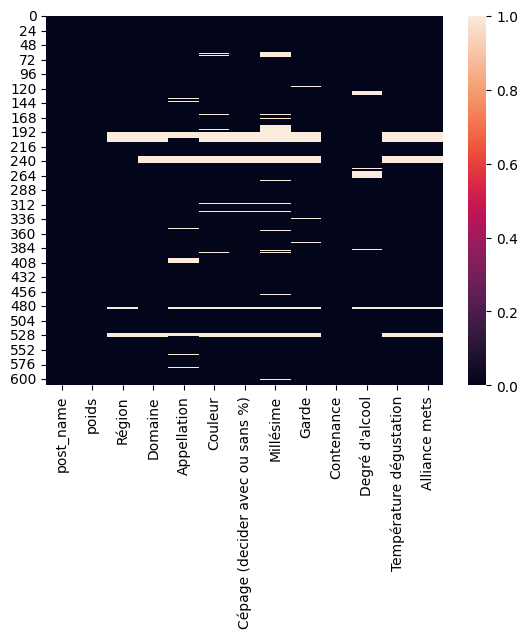

In [26]:
sns.heatmap(carat_vin.isna())

In [27]:
carat_vin.post_name.nunique()

611

In [28]:
carat_vin.nunique()

post_name                          611
poids                                3
Région                              17
Domaine                            135
Appellation                        174
Couleur                              3
Cépage (decider avec ou sans %)    195
Millésime                           15
Garde                               16
Contenance                           7
Degré d'alcool                      24
Température dégustation             12
Alliance mets                      351
dtype: int64

In [29]:
#PK : post_name

## fichier CSV WEB

In [30]:
web =pd.read_csv("../data/WEB P6.csv")
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [31]:
web.tail(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1503,14897,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-24 21:18:32,...,gratavinum-priorat-gv5-2011,2020-06-26 15:05:03,2020-06-26 13:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1504,15736,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-24 21:32:59,...,gratavinum-priorat-2%cf%80r-2017,2020-06-24 11:45:03,2020-06-24 09:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1505,15740,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-25 12:32:17,...,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 11:35:02,2020-08-27 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1506,15845,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-04-25 12:43:23,...,chateau-jean-faure-saint-emilion-grand-cru-2016,2020-07-20 17:09:23,2020-07-20 15:09:23,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1507,15741,0,0,0,0.0,2.0,NaN,NaN,2.0,2020-04-25 12:49:49,...,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
web.sample(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
79,16238,0,0,0,0.0,7.0,taxable,NaN,2.0,2018-02-13 13:57:13,...,elian-daros-cotes-du-marmandais-chante-coucou-...,2020-08-27 10:25:57,2020-08-27 08:25:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
129,15714,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-02-16 09:50:55,...,lucien-boillot-pommard-2017,2020-01-20 09:30:12,2020-01-20 08:30:12,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
340,5646,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-18 20:24:22,...,domaine-mure-cremant-dalsace-cuvee-prestige,2020-08-22 10:05:03,2020-08-22 08:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
782,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,15710,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-10-05 10:46:15,...,lucien-boillot-gevrey-chambertin-1er-cru-les-c...,2020-07-03 09:30:12,2020-07-03 07:30:12,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
543,15921,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-01-15 16:31:35,...,albert-boxler-riesling-grand-cru-sommerberg-d-...,2020-08-25 14:00:04,2020-08-25 12:00:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
249,15452,0,0,0,0.0,15.0,taxable,NaN,2.0,2018-04-13 15:15:26,...,gilbert-picq-chablis-vosgros-1er-cru-2017,2020-08-26 11:25:02,2020-08-26 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
151,15310,0,0,0,0.0,14.0,taxable,NaN,2.0,2018-02-20 10:07:41,...,parce-freres-cotes-roussillon-zoe-rouge-2018,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1445,15834,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-07-16 10:22:33,...,domaine-de-vaccelli-ajaccio-blanc-sirocco-2017,2020-05-15 21:10:30,2020-05-15 19:10:30,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
899,15629,0,0,0,0.0,9.0,NaN,NaN,2.0,2018-02-14 17:25:46,...,hortus-pic-saint-loup-la-bergerie-2018,2020-08-27 09:30:10,2020-08-27 07:30:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [33]:
web.shape

(1513, 28)

In [34]:
web.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

In [35]:
web.loc[:,"post_name"]

0                                  bon-cadeau-de-25-euros
1             pierre-jean-villa-saint-joseph-preface-2018
2               pierre-jean-villa-saint-joseph-tilde-2017
3       pierre-jean-villa-croze-hermitage-accroche-coe...
4                       pierre-jean-villa-igp-gamine-2018
                              ...                        
1508                      mouthes-le-bihan-aime-chai-2015
1509           camin-larredya-jurancon-sec-la-virada-2018
1510               jamet-cote-rotie-fructus-voluptas-2018
1511       clos-du-mont-olivet-chateauneuf-du-pape-2007-2
1512    domaine-saint-nicolas-fiefs-vendeens-blanc-les...
Name: post_name, Length: 1513, dtype: object

In [36]:
web.dtypes.value_counts()

object     15
float64    10
int64       3
Name: count, dtype: int64

In [37]:
web.isna()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1509,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1510,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1511,False,False,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [38]:
web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [39]:
web.isna().mean().round(2)

sku                      0.06
virtual                  0.00
downloadable             0.00
rating_count             0.00
average_rating           0.05
total_sales              0.05
tax_status               0.53
tax_class                1.00
post_author              0.05
post_date                0.05
post_date_gmt            0.05
post_content             1.00
post_title               0.05
post_excerpt             0.53
post_status              0.05
comment_status           0.05
ping_status              0.05
post_password            1.00
post_name                0.05
post_modified            0.05
post_modified_gmt        0.05
post_content_filtered    1.00
post_parent              0.05
guid                     0.05
menu_order               0.05
post_type                0.05
post_mime_type           0.53
comment_count            0.05
dtype: float64

In [40]:
web.isna().mean(axis=1).round(2).sort_values(ascending = False)

756    0.89
455    0.89
523    0.89
529    0.89
598    0.89
       ... 
498    0.18
497    0.18
496    0.18
495    0.18
0      0.18
Length: 1513, dtype: float64

In [41]:
hmweb = web.isna().mean(axis=1).round(2).sort_values(ascending = False).value_counts()
hmweb

0.21    716
0.18    714
0.89     83
Name: count, dtype: int64

<Axes: >

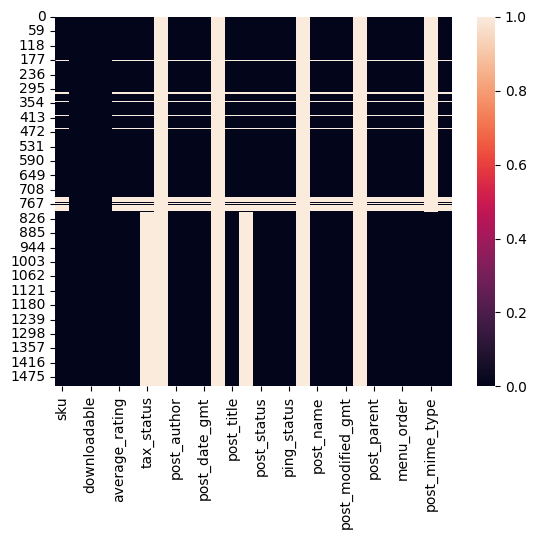

In [42]:
sns.heatmap(web.isna())

In [43]:
web.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [44]:
#FK / PK : post_name & SKU
#booléen : post_author post_type
#INT : SKU total_sales
#DROP columns : virtual / downloadable / rating_count / average_rating / tax_status / tax_class / post_date_gmt / 
#post_modified_gmt / post_content / post_status / comment_status / ping_status / post_password / post_content_filtered / 
#post_parent / menu_order / post_mime_type / comment_count

## fichier CSV Liaison

In [45]:
liaison =pd.read_csv("../data/Liaison P6.csv")
liaison.head()

,product_id,id_web = SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [46]:
liaison.tail()

,product_id,id_web = SKU
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


In [47]:
liaison.sample(20)

,product_id,id_web = SKU
742,6617,16031
4,4039,19815
821,7204,NaN
570,5695,16304
524,5506,14192
516,5484,15756
94,4165,15075
332,4713,14746
263,4617,10459
640,5900,12869


In [48]:
liaison.shape

(825, 2)

In [49]:
liaison.dtypes

product_id       int64
id_web = SKU    object
dtype: object

In [50]:
liaison.isna().sum()

product_id       0
id_web = SKU    91
dtype: int64

In [51]:
liaison.isna().mean().round(2)

product_id      0.00
id_web = SKU    0.11
dtype: float64

In [52]:
liaison.nunique()

product_id      825
id_web = SKU    734
dtype: int64

In [53]:
#PK : product_id
#attention bon-cadeau-25-euros

### CLEANING

In [54]:
#DROP columns : virtual downloadable  rating_count average_rating tax_status tax_class post_date_gmt post_modified_gmt
#post_content post_status comment_status ping_status post_password post_content_filtered post_parent menu_order
#post_mime_type comment_count

Conservation des 2 lignes/produits dont les sku sont manquants et remplacés par "bon-cadeau..."

In [59]:
# Filtrer les lignes où 'sku' n'est pas NaN
web_filtered_non_na = web.dropna(subset=['sku'])

# Filtrer les lignes dont la colonne 'sku' commence par 'bon_cadeau' ou a la valeur 'bon-cadeau-25-euros'
filtered_web = web_filtered_non_na[
    web_filtered_non_na['sku'].str.startswith('bon_cadeau') |
    (web_filtered_non_na['sku'] == 'bon-cadeau-25-euros')
]

# Afficher le DataFrame filtré
print(filtered_web)

                      sku  virtual  downloadable  rating_count  \
0     bon-cadeau-25-euros        0             0             0   
1209  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  tax_class  post_author  \
0                0.0         10.0    taxable        NaN          1.0   
1209             0.0         10.0        NaN        NaN          1.0   

                post_date  ...               post_name        post_modified  \
0     2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros  2018-06-01 14:13:57   
1209  2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros  2018-06-01 14:13:57   

        post_modified_gmt post_content_filtered post_parent  \
0     2018-06-01 12:13:57                   NaN         0.0   
1209  2018-06-01 12:13:57                   NaN         0.0   

                                                   guid menu_order  \
0     https://www.bottle-neck.fr/?post_type=product&...        0.0   
1209  https://ww

In [66]:
#web.drop([0, 1209]) 

In [65]:
web.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_date_gmt','post_modified_gmt','post_content',
                  'post_status','comment_status','ping_status','post_password','post_content_filtered','post_parent','menu_order','post_mime_type',
                  'comment_count'])

,sku,total_sales,post_author,post_date,post_title,post_excerpt,post_name,post_modified,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [ ]:
#type Boléen : onsale_web / stock_status
erp['onsale_web']= erp['onsale_web'].astype(bool)

In [ ]:
erp["stock_status"]= erp['stock_status'].astype(bool)
print(erp.dtypes)

product_id         int64
onsale_web          bool
price             object
stock_quantity     int64
stock_status        bool
dtype: object


In [ ]:
erp.price = erp.price.str.replace(",",".")

In [ ]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,True
1,3849,True,34.3,0,True
2,3850,True,20.8,0,True
3,4032,True,14.1,0,True
4,4039,True,46,0,True
...,...,...,...,...,...
820,7203,False,45,30,True
821,7204,False,45,9,True
822,7247,True,54.8,23,True
823,7329,False,26.5,14,True


In [ ]:
erp["price"] = erp.price.astype(float)
print(erp.dtypes)

product_id          int64
onsale_web           bool
price             float64
stock_quantity      int64
stock_status         bool
dtype: object


In [ ]:
#booléen : post_author post_type
web["post_type"] = web["post_type"].astype(bool)
web["post_author"] = web["post_author"].astype(bool)
print(web.dtypes)

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author                 bool
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                   bool
post_mime_type            object
comment_count            float64
dtype: object


In [ ]:
#INT : SKU total_sales
web['total_sales'].fillna(0, inplace=True)
web['total_sales'] = web['total_sales'].astype(int)
print(web.dtypes)

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales                int32
tax_status                object
tax_class                float64
post_author                 bool
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                   bool
post_mime_type            object
comment_count            float64
dtype: object


C:\Users\josse\AppData\Local\Temp\ipykernel_15496\3785251976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  web['total_sales'].fillna(0, inplace=True)


In [ ]:
#millésime=INT carat_vin
carat_vin['Millésime'].fillna(0, inplace=True)
carat_vin['Millésime'] = carat_vin['Millésime'].astype(int)
print(carat_vin.dtypes)


post_name                          object
poids                              object
Région                             object
Domaine                            object
Appellation                        object
Couleur                            object
Cépage (decider avec ou sans %)    object
Millésime                           int32
Garde                              object
Contenance                         object
Degré d'alcool                     object
Température dégustation            object
Alliance mets                      object
dtype: object


C:\Users\josse\AppData\Local\Temp\ipykernel_15496\2477921544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carat_vin['Millésime'].fillna(0, inplace=True)


In [ ]:
# Remplacer les valeurs non numériques par NaN
web['sku'] = pd.to_numeric(web['sku'], errors='coerce')

print(web.dtypes)

sku                      float64
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales                int32
tax_status                object
tax_class                float64
post_author                 bool
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                   bool
post_mime_type            object
comment_count            float64
dtype: object


In [ ]:
print(web)

          sku  virtual  downloadable  rating_count  average_rating  \
0         NaN        0             0             0             0.0   
1     15298.0        0             0             0             0.0   
2     15296.0        0             0             0             0.0   
3     15300.0        0             0             0             0.0   
4     19814.0        0             0             0             0.0   
...       ...      ...           ...           ...             ...   
1508  16135.0        0             0             0             0.0   
1509  15891.0        0             0             0             0.0   
1510  15887.0        0             0             0             0.0   
1511      NaN        0             0             0             0.0   
1512  16230.0        0             0             0             0.0   

      total_sales tax_status  tax_class  post_author            post_date  \
0              10    taxable        NaN         True  2018-06-01 13:53:46   
1    

In [ ]:
# Remplacer les valeurs non numériques par NaN
liaison['id_web = SKU'] = pd.to_numeric(liaison['id_web = SKU'], errors='coerce')

print(liaison.dtypes)

product_id        int64
id_web = SKU    float64
dtype: object


MERGE

In [ ]:
liaison.columns=['product_id','sku']

In [ ]:
liaison

,product_id,sku
0,3847,15298.0
1,3849,15296.0
2,3850,15300.0
3,4032,19814.0
4,4039,19815.0
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,NaN
823,7329,NaN


In [ ]:
liaison['sku'].fillna(-1,inplace=True)

C:\Users\josse\AppData\Local\Temp\ipykernel_15496\1390406215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liaison['sku'].fillna(-1,inplace=True)


In [ ]:
liaison = liaison.astype(int)

In [ ]:
liaison.dtypes

product_id    int32
sku           int32
dtype: object

# Merges

## Merge erp_liaison

In [ ]:
merged_erp_liaison = pd.merge(erp, liaison, on='product_id', how='outer', indicator=True)
display(merged_erp_liaison)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,True,24.2,0,True,15298,both
1,3849,True,34.3,0,True,15296,both
2,3850,True,20.8,0,True,15300,both
3,4032,True,14.1,0,True,19814,both
4,4039,True,46.0,0,True,19815,both
...,...,...,...,...,...,...,...
820,7203,False,45.0,30,True,-1,both
821,7204,False,45.0,9,True,-1,both
822,7247,True,54.8,23,True,-1,both
823,7329,False,26.5,14,True,-1,both


In [ ]:
erp.shape

(825, 5)

In [ ]:
liaison.shape

(825, 2)

In [ ]:
merged_erp_liaison._merge.value_counts()

_merge
both          825
left_only       0
right_only      0
Name: count, dtype: int64

<Axes: >

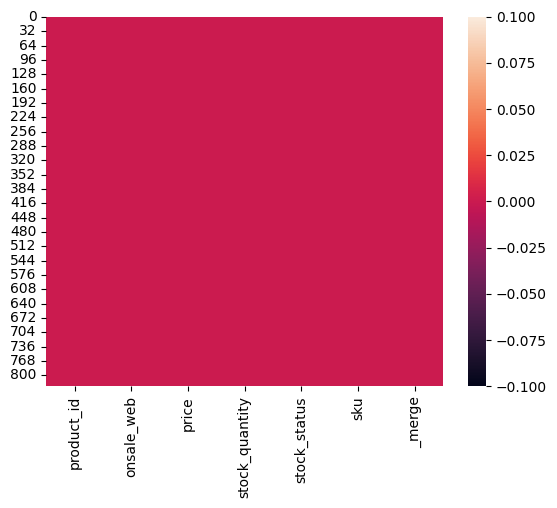

In [ ]:
sns.heatmap(merged_erp_liaison.isna())

In [ ]:
merged_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,True,24.2,0,True,15298,both
1,3849,True,34.3,0,True,15296,both
2,3850,True,20.8,0,True,15300,both
3,4032,True,14.1,0,True,19814,both
4,4039,True,46.0,0,True,19815,both
...,...,...,...,...,...,...,...
820,7203,False,45.0,30,True,-1,both
821,7204,False,45.0,9,True,-1,both
822,7247,True,54.8,23,True,-1,both
823,7329,False,26.5,14,True,-1,both


In [ ]:
merged_erp_liaison.dtypes

product_id           int64
onsale_web            bool
price              float64
stock_quantity       int64
stock_status          bool
sku                  int32
_merge            category
dtype: object

## Préparation à merge erp_liaison et web

In [ ]:
web.dtypes

sku                      float64
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales                int32
tax_status                object
tax_class                float64
post_author                 bool
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                   bool
post_mime_type            object
comment_count            float64
dtype: object

In [ ]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,True
1,3849,True,34.3,0,True
2,3850,True,20.8,0,True
3,4032,True,14.1,0,True
4,4039,True,46.0,0,True


In [ ]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6,taxable,NaN,True,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
2,15296,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
3,15300,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
4,19814,0,0,0,0.0,3,taxable,NaN,True,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
5,19815,0,0,0,0.0,0,taxable,NaN,True,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0


In [ ]:
web.sku.isna().sum()

89

In [ ]:
web.sku.isna().mean()

0.058823529411764705

In [ ]:
_web = web.dropna(subset=['sku'])
_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6,taxable,NaN,True,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
2,15296,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
3,15300,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
4,19814,0,0,0,0.0,3,taxable,NaN,True,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
5,19815,0,0,0,0.0,0,taxable,NaN,True,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0


In [ ]:
web.shape

(1513, 28)

In [ ]:
_web.shape

(1424, 28)

In [ ]:
WEB_SAVE = web.copy()

In [ ]:
web = web.dropna(subset=["sku"])
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298.0,0,0,0,0.0,6,taxable,NaN,True,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
2,15296.0,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
3,15300.0,0,0,0,0.0,0,taxable,NaN,True,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
4,19814.0,0,0,0,0.0,3,taxable,NaN,True,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
5,19815.0,0,0,0,0.0,0,taxable,NaN,True,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,15741.0,0,0,0,0.0,2,NaN,NaN,True,2020-04-25 12:49:49,...,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0
1508,16135.0,0,0,0,0.0,5,NaN,NaN,True,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0
1509,15891.0,0,0,0,0.0,0,NaN,NaN,True,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0
1510,15887.0,0,0,0,0.0,0,NaN,NaN,True,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0


In [ ]:
web['sku'] = web['sku'].astype(int)

C:\Users\josse\AppData\Local\Temp\ipykernel_15496\3298721935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web['sku'] = web['sku'].astype(int)


In [ ]:
web.sku.dtypes

dtype('int32')

In [ ]:
merged_erp_liaison.sku.dtypes

dtype('int32')

## Merge erp_liaison and web

In [ ]:
merged_erp_liaison.drop(columns=['_merge'], inplace=True, errors="ignore")
merged_erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,True,24.2,0,True,15298
1,3849,True,34.3,0,True,15296
2,3850,True,20.8,0,True,15300
3,4032,True,14.1,0,True,19814
4,4039,True,46.0,0,True,19815
...,...,...,...,...,...,...
820,7203,False,45.0,30,True,-1
821,7204,False,45.0,9,True,-1
822,7247,True,54.8,23,True,-1
823,7329,False,26.5,14,True,-1


In [ ]:
merged_erp_web = pd.merge(merged_erp_liaison, web, on='sku', how='outer', indicator=True)
merged_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,4055,False,86.1,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,4090,False,73.0,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,4092,False,47.0,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4195,False,14.1,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,4209,False,73.5,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,5561,True,58.0,0,True,19820,0.0,0.0,0.0,0.0,...,2019-11-02 12:59:44,2019-11-02 11:59:44,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0,both
1533,5563,True,58.0,0,True,19821,0.0,0.0,0.0,0.0,...,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0,both
1534,5563,True,58.0,0,True,19821,0.0,0.0,0.0,0.0,...,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,True,image/jpeg,0.0,both
1535,5565,True,92.0,0,True,19822,0.0,0.0,0.0,0.0,...,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,True,NaN,0.0,both


<Axes: >

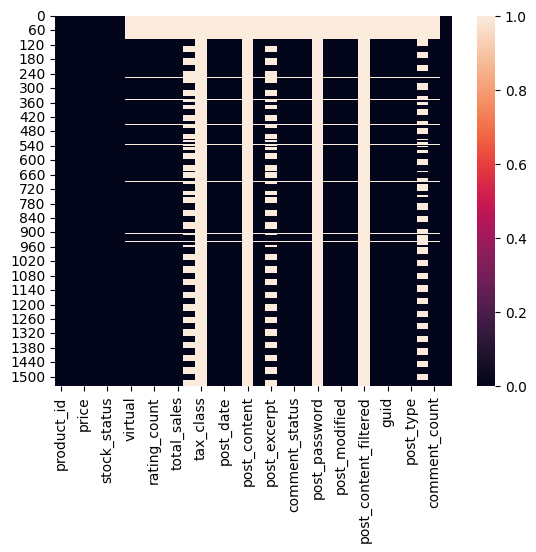

In [ ]:
sns.heatmap(merged_erp_web.isna())

## Préparation à merge erp_web et carat_vin

In [ ]:
merged_erp_web['post_name'] = merged_erp_web['post_name'].astype(str)
carat_vin['post_name'] = carat_vin['post_name'].astype(str)

In [ ]:
merged_erp_web.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_date_gmt','post_modified_gmt','post_content',
                  'post_status','comment_status','ping_status','post_password','post_content_filtered','post_parent','menu_order','post_mime_type',
                  'comment_count'])

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_title,post_excerpt,post_name,post_modified,guid,post_type,_merge
0,4055,False,86.1,0,True,-1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,left_only
1,4090,False,73.0,0,True,-1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,left_only
2,4092,False,47.0,0,True,-1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,left_only
3,4195,False,14.1,0,True,-1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,left_only
4,4209,False,73.5,0,True,-1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,5561,True,58.0,0,True,19820,0.0,True,2018-11-26 10:54:29,Tempier Bandol Migoua 2017,NaN,tempier-bandol-migoua-2017,2019-11-02 12:59:44,https://www.bottle-neck.fr/wp-content/uploads/...,True,both
1533,5563,True,58.0,0,True,19821,0.0,True,2018-11-26 10:56:30,Tempier Bandol Tourtine 2017,"<div id=""wrapper"">\r\n<div id=""container-wrapp...",tempier-bandol-tourtine-2017,2019-11-02 12:59:24,https://www.bottle-neck.fr/?post_type=product&...,True,both
1534,5563,True,58.0,0,True,19821,0.0,True,2018-11-26 10:56:30,Tempier Bandol Tourtine 2017,NaN,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,https://www.bottle-neck.fr/wp-content/uploads/...,True,both
1535,5565,True,92.0,0,True,19822,0.0,True,2018-11-26 10:59:10,Tempier Bandol Cabassaou 2017,"<div id=""wrapper"">\r\n<div id=""container-wrapp...",tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,https://www.bottle-neck.fr/?post_type=product&...,True,both


##  Merge erp_web and carat_vin

In [ ]:
merged_erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,4055,False,86.1,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,4090,False,73.0,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,4092,False,47.0,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4195,False,14.1,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,4209,False,73.5,0,True,-1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
merged_erp_web.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count', '_merge'],
      dtype='object')

In [ ]:
[i for i in merged_erp_web.columns if  "post_name" in i]

['post_name']

In [ ]:
carat_vin.columns

Index(['post_name', 'poids', 'Région', 'Domaine', 'Appellation', 'Couleur',
       'Cépage (decider avec ou sans %)', 'Millésime', 'Garde', 'Contenance',
       'Degré d'alcool', 'Température dégustation', 'Alliance mets'],
      dtype='object')

In [ ]:
allin = pd.merge(merged_erp_web, carat_vin, on='post_name', how='outer')
allin

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,Domaine,Appellation,Couleur,Cépage (decider avec ou sans %),Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,4158,True,18.5,0,True,16093,0.0,0.0,0.0,0.0,...,Planeta,Sicilia,Rouge,Nerello Mascalese,2020.0,4-7 ans,75cl,13%,14°C,"Charcuterie, Grillades, Viande rouge"
1,4158,True,18.5,0,True,16093,0.0,0.0,0.0,0.0,...,Planeta,Sicilia,Rouge,Nerello Mascalese,2020.0,4-7 ans,75cl,13%,14°C,"Charcuterie, Grillades, Viande rouge"
2,5826,True,41.2,0,True,15325,0.0,0.0,0.0,0.0,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2018.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
3,5826,True,41.2,0,True,15325,0.0,0.0,0.0,0.0,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2018.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
4,5827,True,55.0,11,True,15328,0.0,0.0,0.0,0.0,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2019.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,4115,True,100.0,11,True,15382,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,4108,True,31.7,0,True,15353,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,4108,True,31.7,0,True,15353,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,4138,True,25.7,0,True,15341,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## découverte du fichier mergé (allin)

In [ ]:
allin.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_date_gmt','post_modified_gmt','post_content',
                  'post_status','comment_status','ping_status','post_password','post_content_filtered','post_parent','menu_order','post_mime_type',
                  'comment_count'])

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_title,...,Domaine,Appellation,Couleur,Cépage (decider avec ou sans %),Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,4158,True,18.5,0,True,16093,0.0,True,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,...,Planeta,Sicilia,Rouge,Nerello Mascalese,2020.0,4-7 ans,75cl,13%,14°C,"Charcuterie, Grillades, Viande rouge"
1,4158,True,18.5,0,True,16093,0.0,True,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,...,Planeta,Sicilia,Rouge,Nerello Mascalese,2020.0,4-7 ans,75cl,13%,14°C,"Charcuterie, Grillades, Viande rouge"
2,5826,True,41.2,0,True,15325,4.0,True,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2018.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
3,5826,True,41.2,0,True,15325,4.0,True,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2018.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
4,5827,True,55.0,11,True,15328,3.0,True,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,...,Agnès Levet,Côte Rôtie,Rouge,Syrah,2019.0,10 ans et +,75cl,13%,16°C,"Agneau, Gibier, Pigeon, Viande rouge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,4115,True,100.0,11,True,15382,0.0,True,2018-02-13 11:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,4108,True,31.7,0,True,15353,2.0,True,2018-02-13 10:56:04,Zind-Humbrecht Riesling Herrenweg de Turckheim...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,4108,True,31.7,0,True,15353,2.0,True,2018-02-13 10:56:04,Zind-Humbrecht Riesling Herrenweg de Turckheim...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,4138,True,25.7,0,True,15341,6.0,True,2018-02-13 11:54:31,Zind-Humbrecht Zind 2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

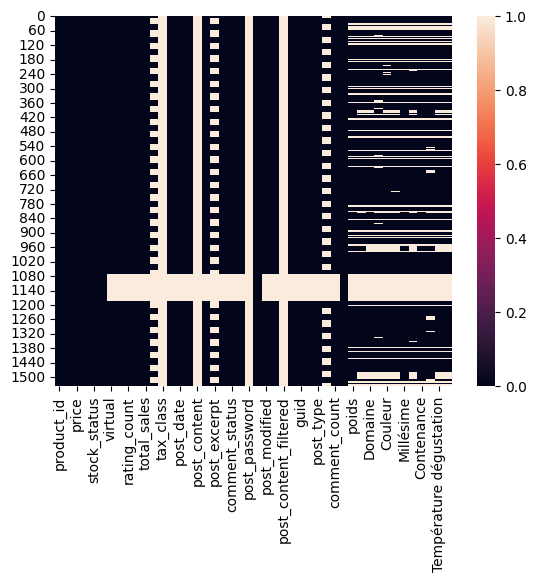

In [ ]:
sns.heatmap(allin.isna())

In [ ]:
allin.dtypes

product_id                            int64
onsale_web                             bool
price                               float64
stock_quantity                        int64
stock_status                           bool
sku                                   int32
virtual                             float64
downloadable                        float64
rating_count                        float64
average_rating                      float64
total_sales                         float64
tax_status                           object
tax_class                           float64
post_author                          object
post_date                            object
post_date_gmt                        object
post_content                        float64
post_title                           object
post_excerpt                         object
post_status                          object
comment_status                       object
ping_status                          object
post_password                   

<Axes: >

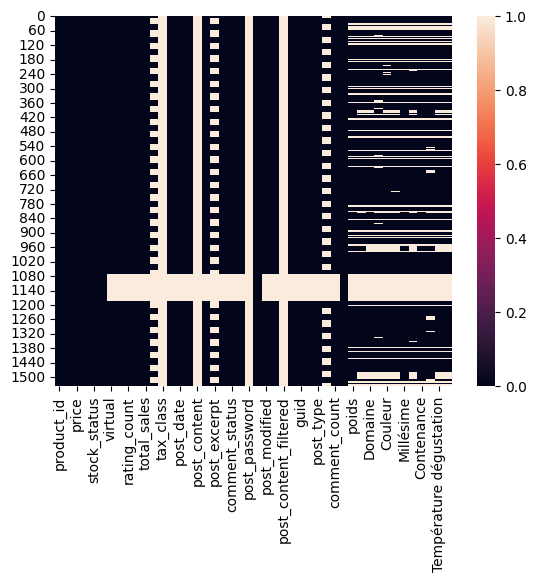

In [ ]:
sns.heatmap(allin.isna())

# Cleaning du fichier mergé (allin) #

## Drop les colonnes non utiles

In [ ]:
allin.drop(columns=['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_date_gmt','post_modified_gmt','post_content',
                  'post_status','comment_status','ping_status','post_password','post_content_filtered','post_parent','menu_order','post_mime_type',
                  'comment_count'], inplace=True)

In [ ]:
allin.drop(columns=['post_author','post_type','Cépage (decider avec ou sans %)','Garde','Température dégustation','Alliance mets','post_excerpt','guid']
           ,inplace=True)

In [ ]:
allin.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
0,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
1,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
2,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
3,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
4,5827,True,55.0,11,True,15328,3.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2019,75cl,13%


## Changement des types de données

In [ ]:
allin.dtypes

product_id           int64
onsale_web            bool
price              float64
stock_quantity       int64
stock_status          bool
sku                  int32
total_sales        float64
post_date           object
post_title          object
post_name           object
post_modified       object
_merge            category
poids               object
Région              object
Domaine             object
Appellation         object
Couleur             object
Millésime          float64
Contenance          object
Degré d'alcool      object
dtype: object

In [ ]:
print(allin['Millésime'].unique())

[2020 2018 2019 2016    0 2017 2012 2015 2011 2010 2021 2007 2014 2013
 2008 2003]


In [ ]:
# Remplacer les valeurs NaN par une valeur valide pour le transformer en INT
allin['Millésime'].fillna(0, inplace=True)  # Remplacez NaN par 0

allin['Millésime'] = allin['Millésime'].astype(int)

print(allin['Millésime'].dtype)


int32


C:\Users\josse\AppData\Local\Temp\ipykernel_15496\2794431810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  allin['Millésime'].fillna(0, inplace=True)  # Remplacez NaN par 0


In [ ]:
allin.dtypes

product_id           int64
onsale_web            bool
price              float64
stock_quantity       int64
stock_status          bool
sku                  int32
total_sales        float64
post_date           object
post_title          object
post_name           object
post_modified       object
_merge            category
poids               object
Région              object
Domaine             object
Appellation         object
Couleur             object
Millésime            int32
Contenance          object
Degré d'alcool      object
dtype: object

In [ ]:
allin.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
0,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
1,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
2,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
3,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
4,5827,True,55.0,11,True,15328,3.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2019,75cl,13%


## Drop les lignes non utiles selon le preview du fichier CSV

In [ ]:
# Drop les lignes avec les indices spécifiés
allin = allin.drop(range(1072, 1185))

# Réindexer le DataFrame après la suppression des lignes
allin = allin.reset_index(drop=True)

In [ ]:
allin.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
0,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
1,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
2,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
3,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
4,5827,True,55.0,11,True,15328,3.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2019,75cl,13%


In [ ]:
# Supprimer la ligne contenant la valeur 4099 et 4055 dans la colonne 'product_id'
allin = allin[allin['product_id'] != 4099]
allin = allin[allin['product_id'] != 4055]

print(allin)

      product_id  onsale_web  price  stock_quantity  stock_status    sku  \
0           4158        True   18.5               0          True  16093   
1           4158        True   18.5               0          True  16093   
2           5826        True   41.2               0          True  15325   
3           5826        True   41.2               0          True  15325   
4           5827        True   55.0              11          True  15328   
...          ...         ...    ...             ...           ...    ...   
1419        4115        True  100.0              11          True  15382   
1420        4108        True   31.7               0          True  15353   
1421        4108        True   31.7               0          True  15353   
1422        4138        True   25.7               0          True  15341   
1423        4138        True   25.7               0          True  15341   

      total_sales            post_date  \
0             0.0  2018-02-13 14:48:58   
1  

## To csv to data

In [ ]:
allin.to_csv('allin_for_analyze.csv', index=False)  
# index=False pour ne pas inclure l'index dans le new fichier CSV
